# Reinforcement Learning

###強化學習(Reinforcement Learning)是人工智慧中策略學習的一種，透過觀測環境，並從環境中獲得最高的報酬率，方式有兩種：
###Upper Confidence Bound (UCB)。
###Thompson Sampling。


# Thompson Sampling Intuition
###1.是一種online decision algorithm，一般較常使用於對新用戶投放廣告的選擇(推薦系統)。
###2.根據歷史情況修正分佈的參數，而需要選擇的時候則對每個廣告的分布進行採樣，根據採樣結果排序來選擇廣告，保持較好的隨機性。
###3.步驟說明。
###(1)透過試驗歸算出廣告背後的機率分佈。
###(2)假設此機率分佈符合beta(wins,lose)分佈。
###(3)透過廣告現有的beta分佈產生隨機數。
###(4)選最大隨機數的那個廣告投放。

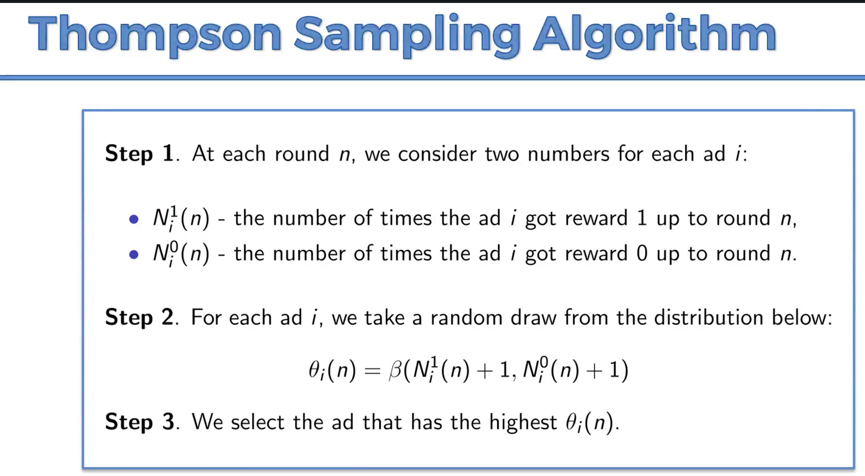


# Thompson Sampling
###範例中共有藍,綠,紅共三台機器，但我們並不知道實際上最佳化的回報率為多少，因此假設最佳化位置為中間桿子，依照取樣結果可得到每台機器的概率分佈。


![%E5%9C%96%E7%89%872png.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%872png.png?raw=true)

###從三項回報率中，選出最高的結果，從圖中可觀察為最右邊的綠色Ｘ。

![%E5%9C%96%E7%89%87%204.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%87%204.png?raw=true)

![%E5%9C%96%E7%89%87%203.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%87%203.png?raw=true)

###經由![%E5%9C%96%E7%89%87%206.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%87%206.png?raw=true?raw=true)
不斷的嘗試，概率會不斷的往最佳化收斂，從圖中可觀測綠,黃為回報率較高的機台。

![%E5%9C%96%E7%89%87%206.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%87%206.png?raw=true?raw=true)



# UCB  VS  Thompson Sampling 

### UCB：預估值會受到平均報酬與信賴區間上界(UCB)所影響，隨著執行次數越多，則會讓預估值與UCB差距越小，也就越可信

![%E5%9C%96%E7%89%878.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%878.png?raw=true)




###UCB
####1.以單一值做決定
####2.每一次抽樣都會影響下一次的結果


 
###Thompson Sampling
####1.以機率分布做決定
####2.抽樣的先後順序都會反饋至結果，因此具備回饋的適應性
####3.以經驗法則來看，Thompson優於UCB
####4.效能上Thompson優於UCB 

# Thompson Sampling Algorithm
###資料預處理
####載入套件,匯入資料

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/Users/laikuanhung/Desktop/Daniel_aws/ML/Thompson_Sampling/Ads_CTR_Optimisation.csv')

####資料內容

![%E5%9C%96%E7%89%87%207.png](https://github.com/daniel790426/Machine-learning/blob/master/%E5%9C%96%E7%89%87%207.png?raw=true)

####設定變數

In [2]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

###建立模型
####執行每round後，每個ad都會產生出random_beta值，並選出最高值為此回合的推薦廣告
####若是預測成功，該廣告的win參數加1,若是預測失敗，該廣告的lost參數加1
####根據每一名客戶隨機選擇投放的廣告，去觀察這一萬名客戶的整體報酬，總投放回應的報酬約2569人

In [3]:
for n in range(0, N):
    ad = 0
    max_random = 0

    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    

In [4]:
print(total_reward)

2569


####以圖像化的方式呈現每個廣告被選中的次數，從圖中可觀察廣告4被選中最多次．

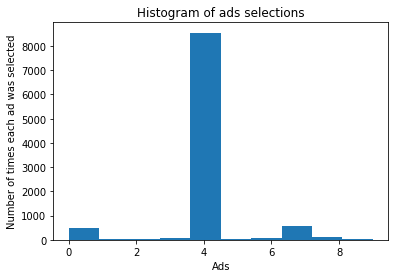

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()